In [1]:
%%html
<script>
  ((window.gitter = {}).chat = {}).options = {
    room: 'MYWAS/Lobby'
  };
</script>
<script src="https://sidecar.gitter.im/dist/sidecar.v1.js" async defer></script>

In [2]:
%%capture
%autosave 0

# Introduction to the Theory of WAS

This notebook discusses the concepts and ideas that are used in WAS. 

## How to use this Tutorial

This notebook serves as a reference tool, like a dictionary or the index in a book, for the economic concepts in WAS.  If you have little or no economic background, or have not studied the economics of a water market, you may want to read the first few sections now.  When you feel like you understand the basic concepts of supply and demand, you can start the [Introduction to the Usage of WAS tutorial](./Intro_Usage.ipynb).  You should return to this notebook when you find words or concepts that are unfamiliar in any of the other tutorials.

## What is WAS?

WAS is a piece of software that contains data and accepts user inputs.  The Water Allocation System (WAS) software uses information about water sources, infrastructure, demand for water, and cooperation plans to build a virtual model of a water system, and calculate important facts and statistics about the model.  

WAS is special because it determines where water _should_ be sent to, or **allocated**, in order to achieve the most (optimal) social benefit.  WAS also calculates the economic value of each water source, linkage, trade agreement, and other pieces of infrastructure.  It is designed to facilitate peacebuilding via water sharing among Israel, Jordan, and Palestine.  By calculating the benefits of cooperation and showing policy makers the best options for water sharing and trading, WAS can encourage peaceful cooperation between nations.  WAS can include environmental and social concerns in the water system model, and thus WAS can be used to analyze environmental, social, and infrastrucutre proposals at the domestic and international level.

The total economic benefit society recieves from using water is called _**social welfare**_.  To determine the allocation of water that leads to the highest social welfare, called the **the optimal condition**, WAS uses a large amount of data and applies economic theory to the data, creating an equation that calculates social welfare.

$$Social\ Welfare\ =\ function(data)$$

When you change parts of the model, you are changing the data inputs above.  When you run the model, WAS uses a mathematical algorithm to determine the optimal conditoins by finding the the equation that maximizes social welfare, shown below.

$$Social\ Welfare_{max}\ =\ function(data_{optimal}) $$

The solutions to the equation above describe the optimal condition.  That is, the solutions tell the user how to optimally allocate water.  The solutions also show the value of each part of the model, such as water source, connection, treatment plant, trade agreement, etc. 

_**It is vital to understand that WAS does not make water policy, it only serves as a tool to guide policymakers.**_

WAS does the following things:

* Determines optimal allocation

* Calculates total social surplus and net social welfare in the optimal condition

* Determines a market equilibrium for each region

* Calculates the (shadow) values and scarcity rents of infrastructre and other transportation projects. 

## Applications of WAS

WAS can be used to discover benefits of international cooperation like:
 * The best places for countries to buy and sell water with eachother
 * The net benefits for each country if they buy and sell water with eachother
 * The best places for countries to collaborate on building new infrastrucutre
 * The net benefits for each country if they collaborate to build infrastructure
 * The best way to allocate water that ensures sustainable usage of water
 
and WAS can be used to discover benefits within a country like:
 * Where new infrastrucute is needed
 * The most beneficial infrastrucutre projects
 * Whether the benefits of a project outweigh the costs
 * The effects of different social and environmental policies 

# Fundamental Economic Concepts

To use WAS it is necessary to understand the concepts in this tutorial.  Even if you are familiar with the economic concepts below, you might still want to read this section because water markets operate differently from the classical markets that are taught in introductory economics courses.

### The Economic Value of Water

The _economic_ value of water is determined by the buyer's willingness to pay for it.  If a buyer is willing to pay \$2 for a gallon of water, the _economic_ value of that water is \$2, even if the price is only \$1.  _Economic_ value does not capture the _human_ value of water.  For instance, imagine a woman who is stuck in the desert with $2 in her pocket.  To her, a gallon of water clearly more valuable than \$2, which is the most she would be willing (and able) to pay.  Water can have high _human_ or _social_ value even when its not affordable.  WAS [provides a way](social policy notebook) for users to account for the personal and social value of water of those in need.  It is important to do so when modeling low-income or refugee populations that need free or subsidized access to water.  

Once basic needs are met, as they are for most households and businesses, the important policy question is where to send the extra water.  Beyond drinking and cooking, businesses, industry, and farmers need water to operate.  Thus, for the purposes of calculating the economic benefits of water allocation, WAS uses the concept of _economic_ value, described below, to determine social welfare.  When the tutorial refers to the value of water, it is refering to the _economic_ value of water.

**The value of water is given by how much a user is willing to pay for water.**  The vaue of water declines as more is used, because  additional unit of water is less usefull, and therefore less valuable, then the last.  This makes sense: A household will be willing to pay more for its first units of water since they are essential for drinking and cooking.  Subsequent units of water for showing or cleaning are less important, and a household would be willing to pay less for them.  This means the units of water used for this purpose are less valuable.  A household would be willing to pay even less for the last units of water needed to water the garden.  This water is the least valuable.  So, **if we know how much households and businesses are willing to pay for water, we know the value of the water.**  The slider and graph show welfare (benefits) for a household from consuming water at different price levels.

In [3]:
%%capture
#!sh convert.sh
from __future__ import print_function
from econgraphs import Market, springMarket, scenarioSimulator, graphMaker, highAltMarket
from ipywidgets import interact, interactive, fixed

/home/alex/anaconda2/lib/python2.7/site-packages/econgraphs/__init__.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.multiplier/Q)**(1/self.elasticity)


<function ipywidgets.widgets.interaction.<lambda>>

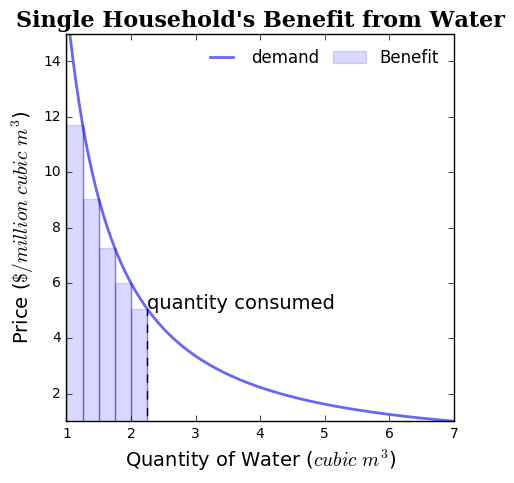

In [4]:
interact(graphMaker.drawHouseholds,price=(0,11,.5),annotate=True)

The graph above shows the quantity of water that a household is willing to purchase at a given price.  Each blue bar represents (roughly) the household's benefit from using that unit of water.  As the quantity of water used rises, the household is willing to pay less for the next unit.  The benefit is high for the first units, since the household would be willing to pay a lot for them.  The benefit is low for the last units, since the household pretty much has all of the water it needs.

Note that first units of water are valuable not _because_ a household is willing to pay more for them, but instead, the a household is willing to pay more for them _because_ the household considers the water very valuable.  

#### The Demand Curve

To measure society's value for water, we aggregate household and other buyers' demand curves into one line, called the **demand curve**, which represents the social demand for water at different prices.  

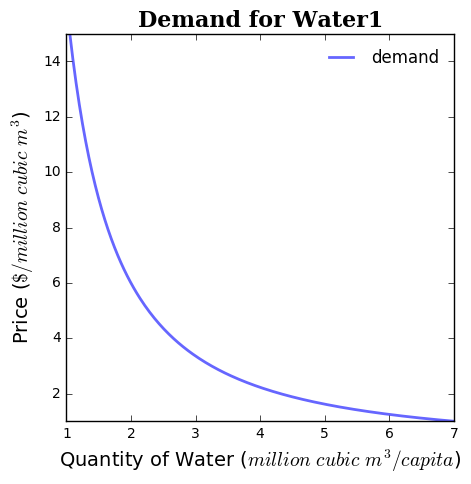

In [5]:
graphMaker.drawDemand()

Each point on the demand line represents a qunatity (Q) and a price (P).  Each quantity level (Q) has a price (P) that shows how much society would be willing to pay for the next unit (Q+1) of water. For instance, at quantity Q = 2, the price consumer are willing to pay for the next unit of water (P) = 6. Since the price (P) represents the maximum society would be willing to pay, it represents the social value of the Qth unit of water.  The area under the demand curve represents the (gross) total social value of water, which is also the social welfare from using the water.  

For info on how we estimate the demand line, see the [Demand Estimation Notebook](google.com)

*graphMaker.drawDemand(subsidy = 3, annotate = True)

#### The Supply Curve

We need to include the costs of providing water in our calculation of social welfare.  To do so, we draw a line representing the cost of providing each quantity of water, called the **supply curve**.  The cost of water increases as more is used.  This makes sense: The first units of water supplied will come from sources that are easy to access, but as those sources are exhausted, it will be more expensive to find and pump additional units of water.  

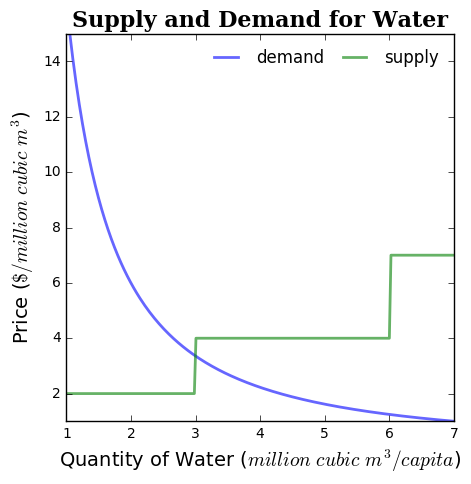

In [6]:
graphMaker.drawFigure(drawSurplus = False)


Each point on the supply line represents a quantity (Q) and price (P).  Each quantity level (Q) has a price (P)  that is the same as the cost of production.  For instance, at quantity Q = 2, the price of providing water (P) = 2.  The supply curve has a strange shape - like stairs - because of the nature of water provision: building pumps and pipes is very expensive, but once they are built, it is virtually free to operate them.  Each step in the supply function represents a new pump or pipe that must be built to supply additional water when previous infrastructure cannot pump any more water.

#### Social Welfare

The overall (net) benefit of providing water, called **Social Welfare** is given by the total shaded area (the **surplus**).  The word _surplus_ is used because the shaded area represents the surplus (extra) value that a consumer gains when she buys water for less than she would have paid.

$$Surplus = Total\ Benefits - Total\ Costs$$  
This graph below shows that the Social Welfare is the _total (gross) social benefit_ from water minus the _total cost_ of providing the water.

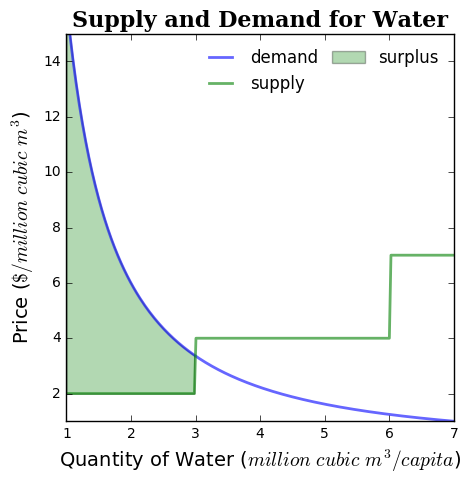

In [7]:
graphMaker.drawFigure()

The shaded area represents the net social gain, or _**surplus**_, from providing all the water that is demanded.

Social welfare does not increase where the supply line is above the demand line, because the costs of providing water is more than people are willing to pay for the water, and thus consumers will not use water even if it is available.  

#### Welfare in WAS

WWAS maximizes the social welfare of water consumption by finding the allocation of water that maximizEs the surplus as shown above.  To do so, it uses an algorithm to calculate the conditions that maximize the total surplus from all markets.

### Market Equilibrium

Market equilibrium is when the quantity supplied is equal to the quantity demanded, meaning the price that buyers are willing to pay is the same as the cost of supplying water.  

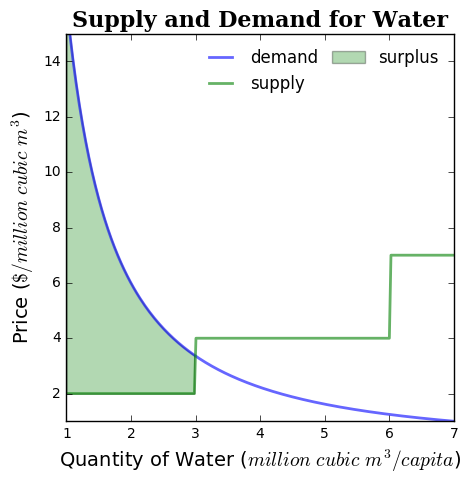

In [8]:
graphMaker.annotate()
graphMaker.drawFigure(annotate=True)

Equilibrium is "optimal", meaning that the quantity and price at the equilibrium point maximizes the overall social welfare (total surplus) from providing water.
Use the graph below to see the total social surplus as quantity supplied changes.  You will see that the shaded area is largest when at the equilibrium level of supply


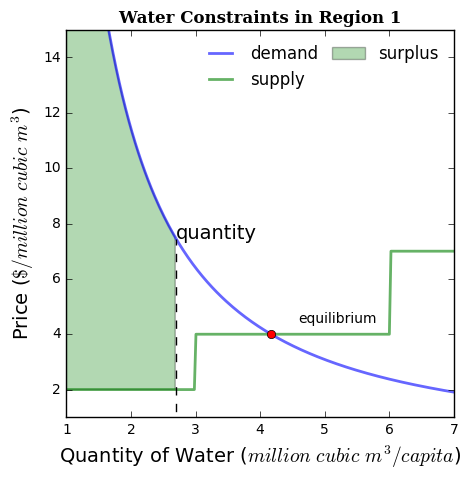

In [9]:
interact(graphMaker.drawQuantity,quantity = (1,3.5,.05),annotate=True)

#### The Market for Water

WAS can model the water market as a _clasicall_ market, and as a _fixed-price_ market: This section discusses both kinds of markets.

In a classical market, each unit of water supplied has the same price.  Buyers pay the same price for the first and last unit of water they consume.  This means that some water is sold for more than the cost of producing it.  The difference between the cost of producing water and the price buyers pay is the profit to the supplier.  When the supplier is a public utility, this "profit" can be kept by the utility or returned to the public via a subsidy or other public spending.  

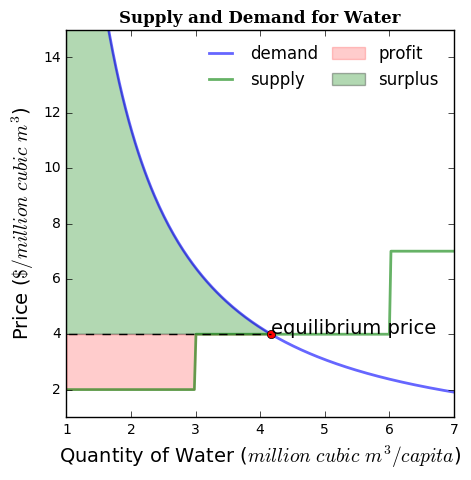

In [10]:
graphMaker.market.demandFunc.multiplier = 11
graphMaker.market.findEQ()
graphMaker.annotate(reset=True)
graphMaker.drawFigure(annotate=True,drawEqLine=True,drawProfit = True)

In a _fixed price_ market, buyers pay a fixed price for the different levels of water use.  An example of such a system is:

| Level | Unit Price | Units Available      |
|-------|------------|----------------------|
| 1     | \$.01       | 10                    |
| 2     | \$.05       | 40                   |
| 3     | \$.3        | all additional units |

When the fixed prices correspond the costs of producing water, all the surplus goes to the buyer of the water, as shown below:

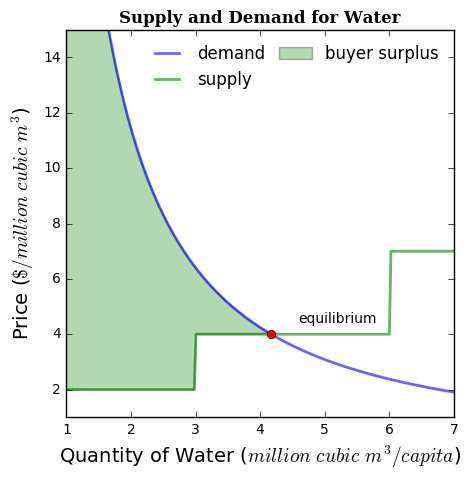

In [25]:
graphMaker.surplusParams['label'] = "buyer surplus"
graphMaker.drawFigure(annotate=True)
graphMaker.surplusParams['label'] = "surplus"
graphMaker.market.demandFunc.multiplier = 7
graphMaker.market.findEQ()

The classical and fixed-price markets shown above have the same amount of surplus at equilibrium, it is simply divided differently.  When the fixed prices are not the same as the costs of production, the difference in between the cost and price can be thought of as a tax or subsidy, and changes the amount of surplus in the market.



#### WAS replaces a market

Part of why WAS is needed is because, in reality, _**there is no market for Water**_ - nor should there be.  It would be wasteful for competing suppliers to build multiple pipelines and wells in the same place.  Instead, WAS (or a similar model) can calculate equilibrium levels of water for classical and fixed-price markets.  For this reason, instead of a free market, a municipal or state administration determines water prices by using a model like WAS to simulate the market.  Thus, although there is no real market for water, society can still achieve the maxiumum social welfare that would arise in such a market.

WAS calculates equilibrium based on information it already has, and from new information given by the user.  It is up to the policy makers to implement policies that will lead to the optimal water allocation described by WAS.

### Optimality without Equilibrium

Not every water market has enough water to reach equilibrium, especially in the Middle East. To understand this idea, consider a region that has two markets but not enough water for both markets to reach equilibrum.  There is some allocation that produces the greatest social welfare.  Use the slider below to change the fraction of the water supply that is sent to market 1 in the graph.

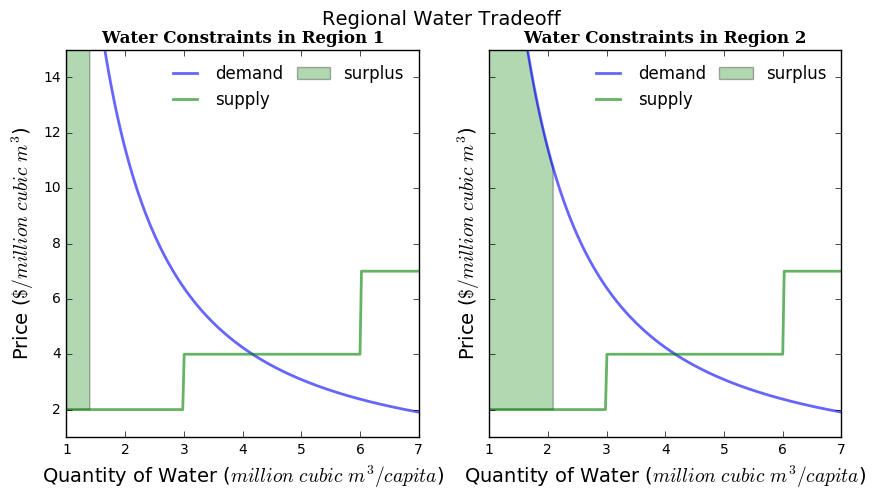

In [17]:
interact(graphMaker.drawTradeoff, totalSupply = fixed(3.5), firstMarketFrac = (.1,1,.05),otherMarket=fixed(None),annotate=fixed(False))

The shaded area shows the total surplus in each region, and the sum is the social welfare in the market.  When water is too scarce to reach equilibrium, it is still possible to maximize the value that society recieves from using the limited water available.  In the example above, the optimal allocation - which maximizes social welfare - is an even split, which means that all the water avalabile is shared equally between markets.

#### Optimality with Different Markets

The alternative scenario below shows a region where it is expensive to pump water to Market 2 because it is sits on top of a hill.

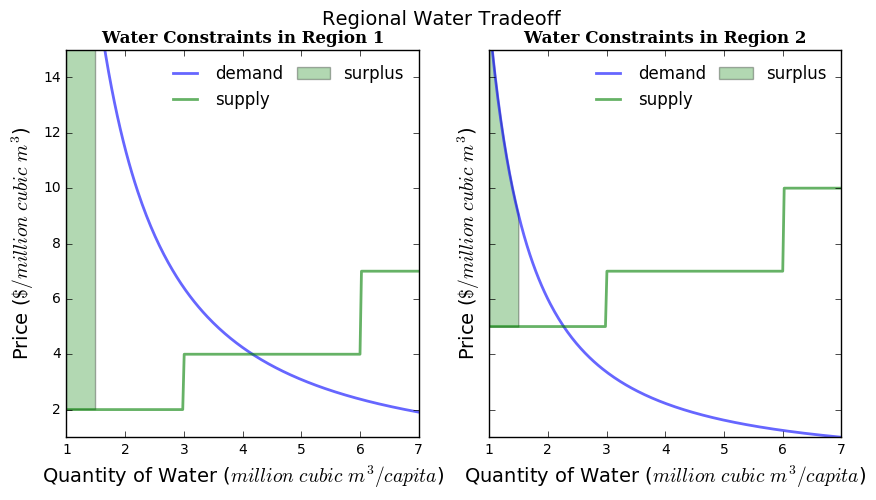

In [18]:
graphMaker.annotate()
interact(graphMaker.drawTradeoff, totalSupply = fixed(3), firstMarketFrac = (.1,1,.05),otherMarket=fixed(highAltMarket),annotate=False)

In the graph above, the best way to allocate water is not clear.  Water is more expensive in the Market 2, and thus it may be wasteful to pump water to Market 2 when it could be used in Market 1 at a lower price.


In a region that does not have enough water for all markets to reach equilibrium, the optimal allocation is when all markets have the same _net social welfare gain from consuming an additional unit_, or _**marginal surplus**_.  This is shown below:

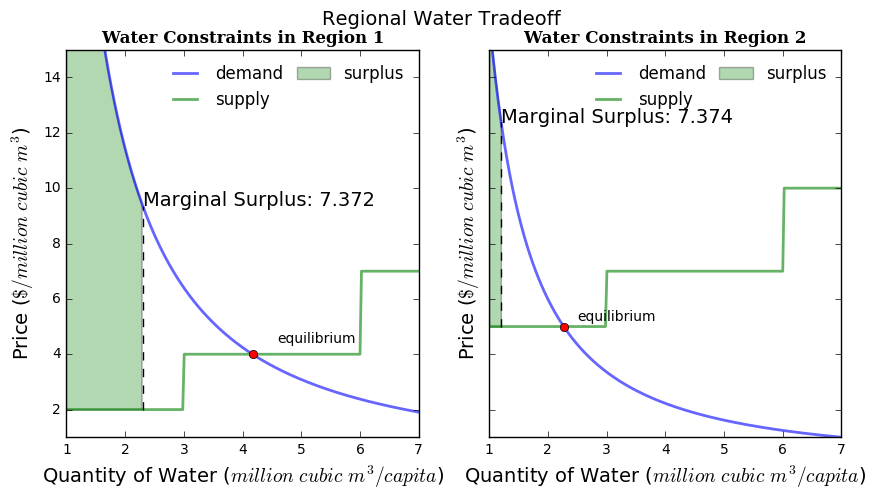

In [19]:
graphMaker.annotate(reset=True)
graphMaker.drawOptimalTradeoff(totalSupply=3.5,otherMarket=highAltMarket,annotate=True)

To understand why this is optimal, consider a scenario where the marginal surplus of an additional unite of water in Market 1 is more than the marginal surplus of an additional unit in Market 2.  Moving a unit of water from Market 1 to Market 2 would increase the total social welfare from the water, increasing the social welfare in the region.  So, if markets do not have the same _**marginal surplus**_, social welfare may be increased by changing the allocation.  You can see how the optimal level of supply changes based on the water available using the slider below.

<function ipywidgets.widgets.interaction.<lambda>>

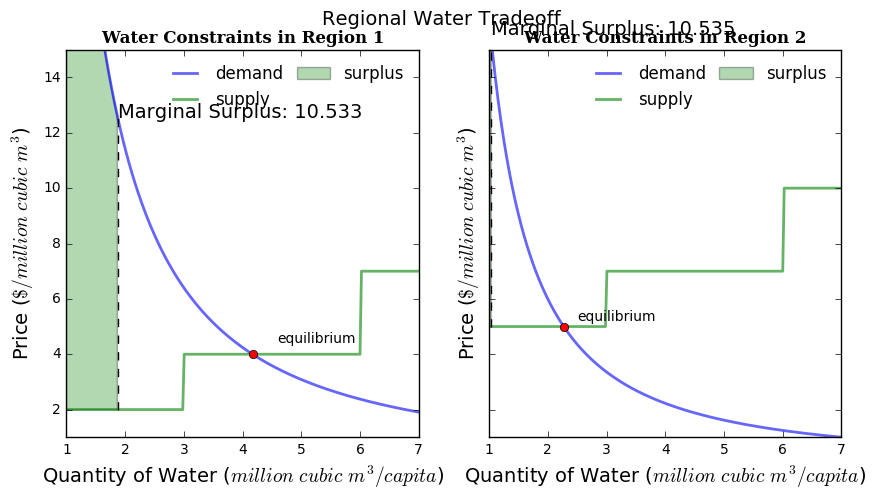

In [20]:
graphMaker.annotate(reset=True)
interact(graphMaker.drawOptimalTradeoff,totalSupply = (2,5,.1), otherMarket = fixed(highAltMarket),annotate=fixed(True), continuous_update=False)

When water is allocated optimally, an additional unit of water increases social welfare equally, no matter which region the water is sent to, because each region has the same _**marginal surplus**_ from additional water.

#### Optimal Allocation in WAS

If there is not enough water for markets to reach equilibrium, WAS calculates the optimal levels of supply to determine the optimal allocation, in which the _**marginal surplus**_ is the same in every market.  Use the slider above to see optimal allocation within a region as water availability changes.

### Shadow Values

In the real world, the amount of water available can be limited by a number of factors.  Examples of contraints on water availablity include:

* the amount of water available at the source
* the amount of water _sustainabily_ available at the source
* the capacity of pumps
* the capacity of water connections
* the absence of connections between markets

It is possible to put a "value" on each of these constraints: using economic theory we can determine how beneficial it would be to ease each restriction.

#### Shadow values for constraints

The **shadow value** of a constraint is the increase in social welfare resulting from relaxing the constaint by a single unit.  For example:

* A shadow value of .10 for a water pumping station means that social welfare would increase by \$.10 if the pump capacity was increased by 1 cm _at no cost_
* A shadow value of .05 for a pipeline means that social welfare would increase by \$.10 if the pipeline capacity was increased by 1 cm _at no cost_

The shadow value does **not** include the cost of providing additional water.

#### Shadow values for water sources

Each water source also has a **shadow value**, since the limited supply of water at each source can be considered a constraint.  The shadow value of water at the source is the social welfare from providing an additional unit of water _at no cost_.  The shadow value for a water source is also the price the market would be willing to pay for the next unit of water.  This is illustrated below.

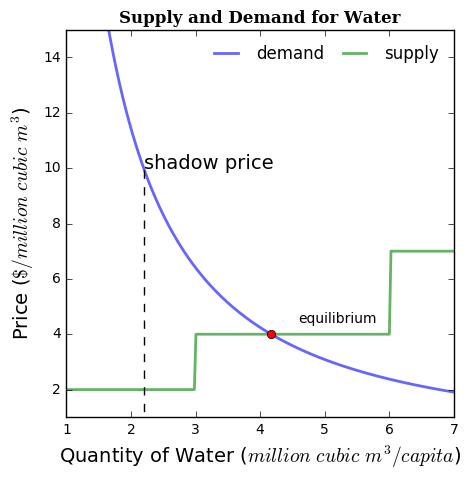

In [15]:
interact(graphMaker.drawShadowValue,quantity=(1,3,.2),drawSurplus=fixed(False),scarcityRent=False, annotate=fixed(True))

#### Scarcity Rent

_**Scarcity rent**_ is the same same as **marginal surplus**, and is defined here to be consistent with other WAS documentation.  Thus, the scarcity rent drawn above is the same as the margnial surplus described earlier.  

When there is no marginal cost to producing an additional unit of water, the scarcity rent for a market is the same as the shaddow value, as illustrated below.

<function ipywidgets.widgets.interaction.<lambda>>

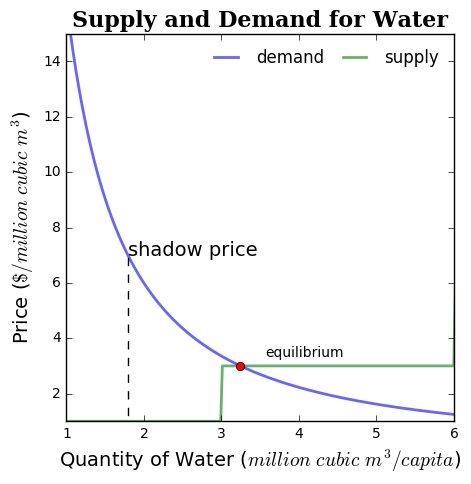

In [16]:
lowMrktGraphMaker = scenarioSimulator(springMarket)
interact(lowMrktGraphMaker.drawShadowValue,quantity=(1,3,.2),drawSurplus=fixed(False),scarcityRent=False, annotate=fixed(True))

Shadow prices are useful because they can guide policy makers in the same way that prices guide a competitive market.  The highest shaddow values reveal the most potential for increasing social welfare.  They also allow comparison of demand for water in different markets.  When calculating social welfare gain, it is **very important** to subtract expected costs from shaddow values.  This is necessary because the shaddow value represents the increase in social welfare from an additional _cost free_ unit of water.

# Review of WAS functionality

The basic uses of WAS are described again below, now using previosly defined concepts.

WAS can be used to discover:
 * How to optimally (re-)allocate water using only existing infrastrucure
 * Social welfare gain from from existing and new linkages
 * Social welfare from sharing water resources, within and among different countries
 * How to optimal allocate water under sustainability constraints
 * The locations that have the greatest need for new water infrastucture
 * The effects of different social policies
 * The effects of different environmental policies
 * The effects of different environmental scenarios (drought, flood)
 * The costs and benefits of the policies described above